<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This is supplemental practice you can finish to get more familliar with K-Means (ie: not required).  This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


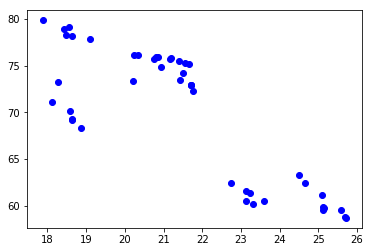

In [3]:
features = ['Pu239', 'Pu240']
df = df[features]

plt.scatter(x=df.Pu240,
            y=df.Pu239,
            c='b')


### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [4]:
# A:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Assign clusters assignments (predictions) back to the original dataframe

In [5]:
df['clusters'] = km.labels_
df.head()

,Pu239,Pu240,clusters
0,75.804,21.204,1
1,75.515,21.408,1
2,75.175,21.668,1
3,78.872,18.428,1
4,73.317,20.223,2


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

Text(0.5, 1.0, 'Clusters!')

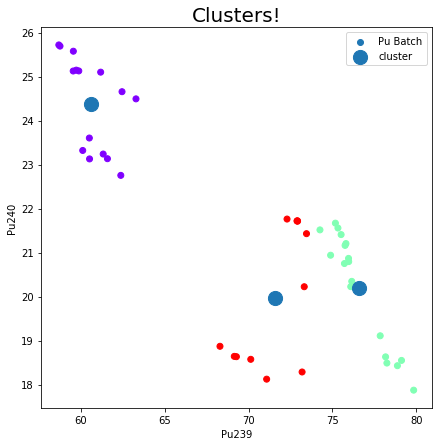

In [6]:
plt.figure(figsize=(7,7))
plt.scatter(x=df.Pu239,
            y=df.Pu240,
            c = df.clusters,
            cmap = 'rainbow',
            label='Pu Batch')
plt.xlabel('Pu239')
plt.ylabel('Pu240')

plt.scatter(pd.DataFrame(km.cluster_centers_)[0],
            pd.DataFrame(km.cluster_centers_)[1],
            marker='o',
            s=200,
            label='cluster')
plt.legend()
plt.title('Clusters!', fontsize=20)

In [7]:
from sklearn.metrics import silhouette_score
silhouette_score(df, km.labels_)

0.6055233390910152

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [8]:
features = ['Pu239', 'Pu240']
df = df[features]
df.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_sc = ss.fit_transform(df)
km = KMeans(n_clusters=3)
km.fit(X_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
df['cluster'] = km.labels_
df.head()

,Pu239,Pu240,cluster
0,75.804,21.204,0
1,75.515,21.408,0
2,75.175,21.668,0
3,78.872,18.428,2
4,73.317,20.223,0


In [11]:
centroids = pd.DataFrame(
    ss.inverse_transform(km.cluster_centers_),
    columns=["x1", "x2"]
)
centroids

,x1,x2
0,74.686722,21.166611
1,60.633933,24.387533
2,74.432583,18.516250


<Figure size 504x504 with 0 Axes>

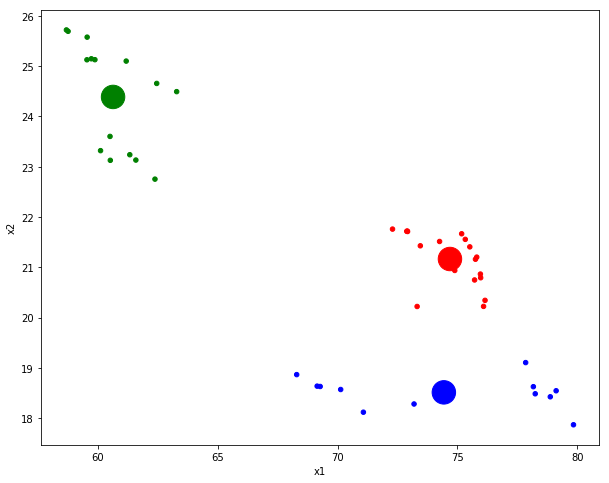

In [12]:
plt.figure(figsize=(7,7))

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="x1", y="x2", 
    marker="o", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [13]:
# A:
from sklearn.metrics import silhouette_score

In [14]:
silhouette_score(X_sc, km.labels_)

0.6332174776862322